Great Learning Project 3 - Decsision Tree and Ensemble Technique


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier


In [2]:
data = pd.read_csv("bank-full.csv", dtype={'job':'category',
                                           'marital':'category',
                                           'education':'category',
                                           'housing':'category',
                                           'default':'category',
                                           'loan':'category',
                                           'contact':'category',
                                           'day': 'category',
                                           'month': 'category',
                                           'poutcome': 'category',
                                           'Target' : 'category'})
data.head()

FileNotFoundError: [Errno 2] File b'bank-full.csv' does not exist: b'bank-full.csv'

In [ ]:
print(data.info())
print(data.describe())

Deliverables 1 - Exploratory Data Analysis:

Univariate Analysis

From data.info() we can check that data is either in integer format or in categorical format. <br>
There is no null or missing value. <br>
Checking pdays as in problem statement, pdays = 999 means no previous contact, but in data the max is 871 days and for no previous contact, it is assumed as pdays = -1 <br>  
The median call duration is around 3 minutes (180s) and the average contact made in between campaign is 2 times.


In [ ]:
sns.countplot(data.Target)
print(data.Target.value_counts(normalize=True))

From above, it is important to note that our data is not balance at all. The target rate that we want is mere 11%. This needs to be treated carefully for model to yield good result. 

In [ ]:
print(data.marital.value_counts(normalize=True))
display(sns.countplot(y="marital", data = data, hue="Target"))

In [ ]:
print(data.education.value_counts(normalize=True))
display(sns.countplot(y='education', data = data, hue='Target'))

In [ ]:
print(data.housing.value_counts(normalize=True))
display(sns.countplot(data.housing, hue=data.Target))

In [ ]:
print(data.loan.value_counts(normalize=True))
display(sns.countplot(data.loan, hue=data.Target))

In [ ]:
print(data.default.value_counts(normalize=True))
display(sns.countplot(data.default, hue=data.Target))

In [ ]:
print(data.job.value_counts(normalize=True))
display(sns.countplot(y='job', data=data, hue='Target'))

In [ ]:
display(sns.countplot(y='poutcome', data=data, hue='Target'))
print(data.poutcome.value_counts(normalize=True))
print(data.Target.value_counts(normalize=True))


In [ ]:
sns.countplot(y='contact', data=data, hue='Target')
print(data.contact.value_counts(normalize = True))

Viewing countplot for categorical variables with their respective outcome. <br>
1. Married customer counts for 60.2% in term of applying term deposit.
2. Customer with no personal loan has higher chance of getting the term deposit.
3. Customer with default credit card will have a lesser chance of getting term deposit approval.
4. ~42% of customer works in either blue-collar or management job. 

In [ ]:
sns.scatterplot(x='age', y='balance', data=data, hue='Target')

In [3]:
sns.countplot(data.month, hue=data.Target)

NameError: name 'data' is not defined

NameError: name 'data' is not defined

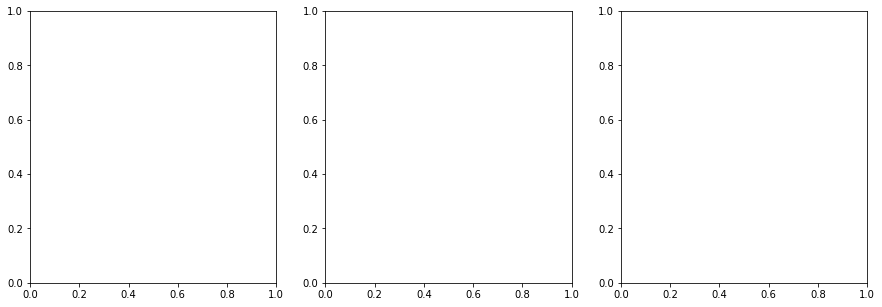

In [4]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

print(data['age'].groupby(data['Target']).describe())
print(data['balance'].groupby(data['Target']).describe())
print(data['duration'].groupby(data['Target']).describe())
sns.boxplot(y=data.age, ax=axs[0])
sns.boxplot(y=data.balance, ax=axs[1])
sns.boxplot(y=data.duration, ax=axs[2])

In [5]:
sns.countplot(data.poutcome, hue=data['Target'])

NameError: name 'data' is not defined

In [6]:
sns.countplot(data.contact, hue=data['Target'])

NameError: name 'data' is not defined

From all the plot above, we can't say for certain which feature contributes towards the likelihood of customer to join the campaign. Some feature appears to be highly correlated with target outcome but we will see if this is indeed the case after we run the data through machine learning algorithm <br>

Some problem for this data: <br>
1. Data is highly imbalanced
2. Mix categorical and numerical which can some algorithm may have struggle with
3. Features have low degree of correlation

Things that can be done to improve result: <br>
1. Oversampling or undersampling dataset. This can be done by duplicating the minority dataset or reducing samples of majority dataset. However, this makes the model prone to overfitting and discarding useful data.  
2. Dropping the outliars or replacing with mode/median/mean
3. One hot encoding to convert categorical variables to numeric. 

Preparing data before applying machine learning technique:

In [18]:
data['month'] = data['month'].replace({'jan':'1',
                                      'feb':'2',
                                      'mar':'3',
                                      'apr':'4',
                                      'may':'5',
                                      'jun':'6',
                                      'jul':'7',
                                      'aug':'8',
                                      'sep':'9',
                                      'nov':'11',
                                      'oct':'10',
                                      'dec':'12'})

In [19]:
target_dummies = pd.get_dummies(data['Target'], prefix = 'target')
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
education_dummies = pd.get_dummies(data['education'], prefix='education')
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
default_dummies = pd.get_dummies(data['default'], prefix='default')
housing_dummies = pd.get_dummies(data['housing'], prefix = 'housing')
loan_dummies = pd.get_dummies(data['loan'], prefix = 'loan')
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix='poutcome')
contact_dummies = pd.get_dummies(data['contact'], prefix ='contact')

In [29]:
concat_data = data
concat_data = pd.concat([data, 
                         poutcome_dummies,
                         marital_dummies, 
                         education_dummies, 
                         job_dummies, 
                         default_dummies,
                         housing_dummies, 
                         contact_dummies,
                         loan_dummies ], axis=1)
concat_data.drop(['marital','education','job','default','loan','housing','poutcome','contact'], axis = 1, inplace=True)
clean_data = concat_data

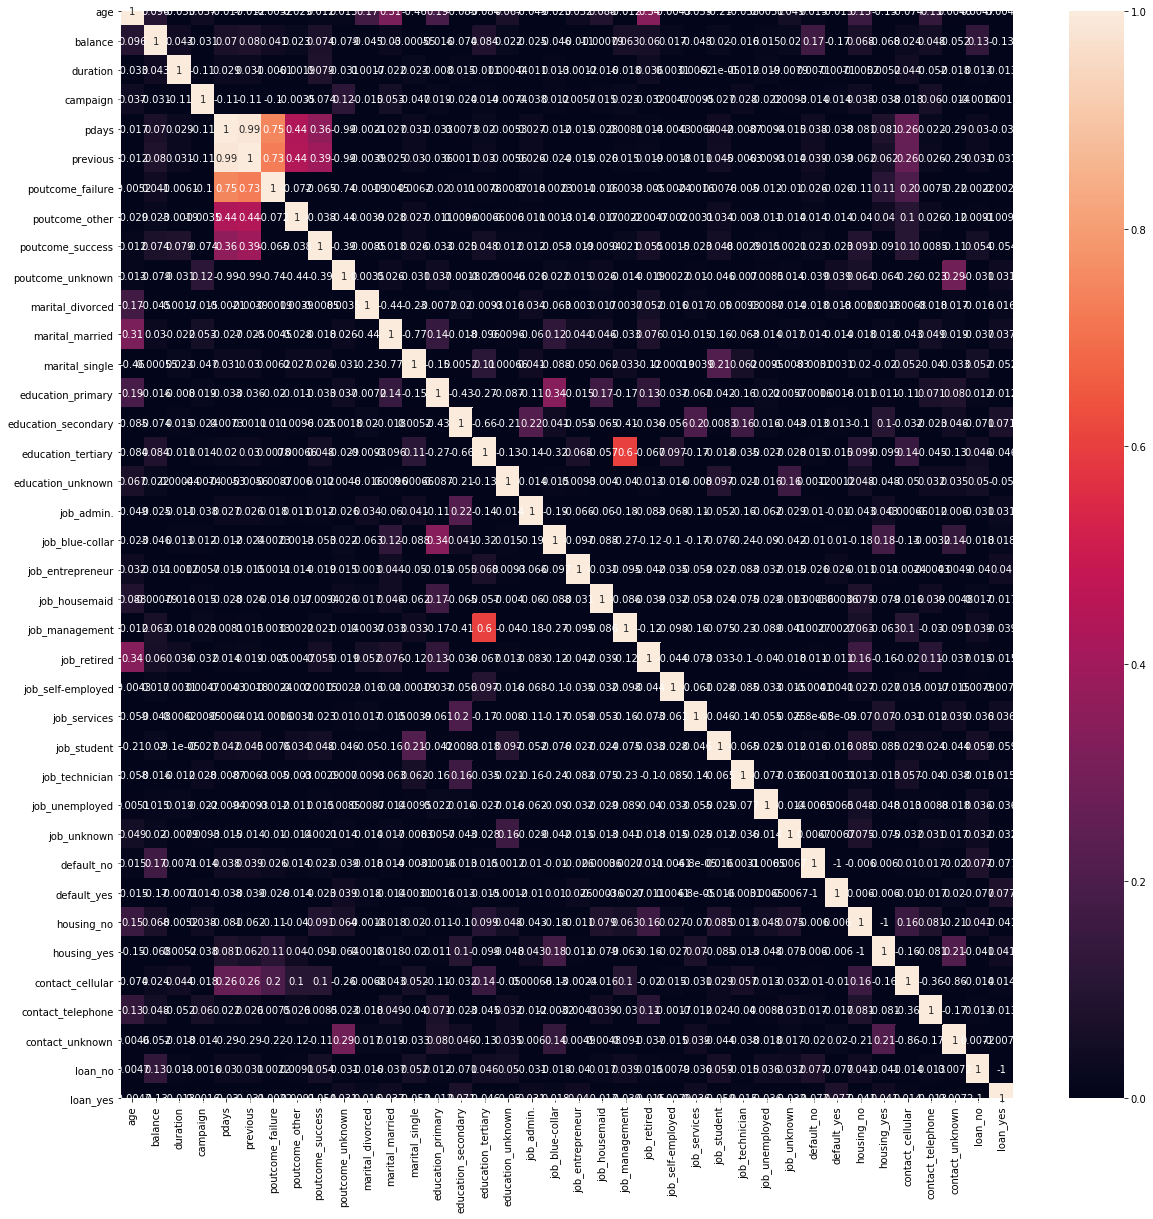

In [21]:

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(concat_data.corr(method='spearman'), annot=True, ax=ax, vmin = 0, vmax=1)


In [30]:
X = concat_data.drop("Target" , axis=1)
y = concat_data.pop("Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)
dTree.fit(X_train, y_train)
dTree.fit(X_test, y_test)

pred_train = dTree.predict(X_train)
pred_test = dTree.predict(X_test)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns))#Print the feature importance of the decision model.Putting this in comment form 

print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

0.8921224760640819
0.9320996756119139
                          Imp
age                  0.038919
balance              0.042580
day                  0.050693
month                0.101199
duration             0.362279
campaign             0.018414
pdays                0.051021
previous             0.010063
poutcome_failure     0.000000
poutcome_other       0.003462
poutcome_success     0.163897
poutcome_unknown     0.000000
marital_divorced     0.001420
marital_married      0.001583
marital_single       0.003453
education_primary    0.000000
education_secondary  0.001835
education_tertiary   0.004136
education_unknown    0.000000
job_admin.           0.001655
job_blue-collar      0.003374
job_entrepreneur     0.004986
job_housemaid        0.001138
job_management       0.003555
job_retired          0.000645
job_self-employed    0.002032
job_services         0.002022
job_student          0.004149
job_technician       0.002969
job_unemployed       0.000000
job_unknown          0.000000
de

- Running standard Decision Tree classifier shows the accuracy score of 90%. 
- Recall and f1 score improve a little bit after training the dataset. However, at 27% recall, the likelihood of customer to accept the campaign is still consider to be low. 
- Hyperparameters chosen is entropy for information gain and with max depth of tree chosen to be at 10. max_depth need to be chosen properly as too high will prone to overfitting and too low will cause the model to suffer in performance. 
- Duration looks like the best estimator as to whether the customer will accept the campaigh or not. However, the value of duration will not be known until after contact is made. 
- Model hence will need to be tuned without duration to indicate the likelihood of success when contact is made and duration is known.


In [31]:
concat_data = clean_data.drop('duration', axis = 1)
concat_data['Target']=data['Target']
#recreate concat_data 

In [32]:
X = concat_data.drop("Target" , axis=1)
y = concat_data.pop("Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)

dTree.fit(X_train, y_train)
dTree.fit(X_test, y_test)

pred_train=dTree.predict(X_train)
pred_test = dTree.predict(X_test)

print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

#print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model

0.8848548045628337
0.9160277204364494
              precision    recall  f1-score   support

          no       0.90      0.97      0.94     27909
         yes       0.53      0.22      0.31      3738

    accuracy                           0.88     31647
   macro avg       0.72      0.60      0.62     31647
weighted avg       0.86      0.88      0.86     31647

              precision    recall  f1-score   support

          no       0.92      0.99      0.95     12013
         yes       0.81      0.35      0.49      1551

    accuracy                           0.92     13564
   macro avg       0.86      0.67      0.72     13564
weighted avg       0.91      0.92      0.90     13564



- As expected, the f1-score and recall drops when duration feature is removed. at 22% recall score, this can be improved further by using ensemble technique
- Keeping every hyperparameters the same to ensure result is consistent
- Advantage of decision tree is definitely the intuitiveness to understand the result. However it is more prone to overfitting if no pruning is done. 

In [41]:

rfcl = RandomForestClassifier(criterion = 'entropy', min_samples_leaf= 2, n_estimators=150, max_features=10)
rfcl.fit(X_train, y_train)
rfcl.fit(X_test, y_test)

pred_train = rfcl.predict(X_train)


pred_test = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(classification_report(y_test, pred_test))

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model

0.9531111766440578
              precision    recall  f1-score   support

          no       0.95      1.00      0.97     12013
         yes       1.00      0.59      0.74      1551

    accuracy                           0.95     13564
   macro avg       0.97      0.80      0.86     13564
weighted avg       0.96      0.95      0.95     13564

                          Imp
age                  0.078625
balance              0.093053
day                  0.084860
month                0.134456
campaign             0.012860
pdays                0.086054
previous             0.012536
poutcome_failure     0.000000
poutcome_other       0.003711
poutcome_success     0.253990
poutcome_unknown     0.001249
marital_divorced     0.003137
marital_married      0.015938
marital_single       0.004610
education_primary    0.001768
education_secondary  0.008761
education_tertiary   0.010667
education_unknown    0.007233
job_admin.           0.005825
job_blue-collar      0.005216
job_entrepreneur     0.0

- Using random forest as our first ensemble algorithm, we can see the improvement in recall and f1-score. 
- hyperparameters chosen is min_sample_leaf = 2, n_estimators = 150 and max_feature = 10. n_estimators signify the number of trees in the forest. This number is chosen in order to grow random tree and have each tree to be slightly different than each other. max_feature is chosen to be 10 as this is the best number for this particular dataset and doing more will likely result in overfitting the data. 
- With better f1-score and recall, this will translate to better prediction and higher chance of success when a contact is made to customer.
- Advantages of randomtree:
1. Using multiple trees together to reduce variance and overfitting, hence improving accuracy
2. Very stable and less impacted by noise and outliers

- Disadvantage of randomtree:
1. Requires much more resources (computational power and time) to create more trees

In [67]:
abcl = AdaBoostClassifier( n_estimators= 50, learning_rate=1)
abcl.fit(X_train, y_train)
abcl.fit(X_test, y_test)
y_pred = abcl.predict(X_test)
abcl.score(X_test , y_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.90      0.99      0.94     12013
         yes       0.65      0.18      0.29      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



- Large feature and highly imbalance dataset makes adaboost not suitable for this problem. 
- Adaboost classifier shows no improvement in recall and f1-score. 
- The hyperparameter chosen for this is n_estimators = 50 and learning_rate = 1. both are highly dependent with each other. 
- Adaboost advantage
1. Considers the weight of each classifiers 
2. Improve learners by simply adding weight, less computational power

- Adaboost disadvantage
1. Cannot handle highly imbalance data 
2. Training is time consuming

In [61]:
bgcl = BaggingClassifier(n_estimators=15, max_samples= .7, bootstrap=True)

bgcl.fit(X_train, y_train)
bgcl.fit(X_test,y_test)
y_pred = bgcl.predict(X_test)
bgcl.score(X_test , y_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.98      1.00      0.99     12013
         yes       0.98      0.83      0.90      1551

    accuracy                           0.98     13564
   macro avg       0.98      0.91      0.94     13564
weighted avg       0.98      0.98      0.98     13564



- Bagging yield the best recall and f1-score value among all algorithm used in this problem
- Hyper parameters chosen is n_estimators = 15, max_samples = .7 and bootstrap =True
- The bootstrap=True is probably the most important feature in this classifier as it draws the sample with replacement, which gives better prediction for our highly imbalance data. 
- Increasing number of estimators can give better result but at the cost of more computing power is needed. 
- Bagging advantage
1. Create replacement when sampling, handles imbalance data well
2. Highly random resampling and creation of multiple estimators reduces variance and help to avoid overfitting

- Bagging disadvantage
1. Can spit out high bias
2. Computationaly expensive especially when scaling to large dataset

In [66]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 1)
gbcl.fit(X_train, y_train)
gbcl.fit(X_test,y_test)
y_pred = gbcl.predict(X_test)
gbcl.score(X_test , y_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.92      0.98      0.95     12013
         yes       0.68      0.31      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.80      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



- Choosing same hyperparameters as adaboost, gradientboost yield a better result compare to adaboost but still inferior to random forest and bagging
- Gradient boost use gradient to identify weak learners whereas adaboost use high weight to identify weak learners.<br>
Gradient boost advantage
1. high flexibility
2. no data preprocessing 

gradient boost disadvantage
1. highly susceptible to outliars
2. need to use cross validation
3. often requires many estimators